### Task 1:
Spend 15 minutes browsing Hugging Face, Tensorflow Hub, or the broader internet <br>
Find two interesting models in your category. <br>
For each model, capure:
- Model name and link
- What task it performs
- Input/output format
- One interesting use case

The first model that I looked at was a text-to-image VAE (https://huggingface.co/REPA-E/e2e-qwenimage-vae). It is part of a larger project that trains VAEs end-to-end, but this VAE is what they are trying to improve, how images can be generated from text. I assume that the input would be text and the code would output a corresponding image. I assume something like this could be used for aiding design ideas, to create something just from the text given. <br><br>
The other model I looked at was a VAE that could decode with float16 precision (https://huggingface.co/madebyollin/sdxl-vae-fp16-fix). The input is a text prompt, and the output is an image, and this could help with image transfer across multiple devices, in case one device's interpeter can only use float16 precision.

### Task 2
Skim the model card and write one sentence explaining how this model is trained (loss function, dataset, etc.)
Note if the model uses Attention, Diffusion, or some other mechanism.

The first model's model card doesn't quite explain how the model is trained. But the dataset it uses are images, and it uses diffusion, and it uses hinge loss for training. The second model also uses diffusion and images to train.

### Task 3
Use the model in some way and share your results.

In [9]:
from io import BytesIO
import requests
from diffusers import AutoencoderKLQwenImage
import numpy as np
import torch
from PIL import Image

response = requests.get("https://raw.githubusercontent.com/End2End-Diffusion/fuse-dit/main/assets/example.png")
# device = "cuda"

image = torch.from_numpy(
    np.array(
        Image.open(BytesIO(response.content))
    )
).permute(2, 0, 1).unsqueeze(0).to(torch.float32) / 127.5 - 1
image = image#.to(device)

vae = AutoencoderKLQwenImage.from_pretrained("REPA-E/e2e-qwenimage-vae")#.to(device)

# Add frame dimension (required for QwenImage VAE)
image_ = image.unsqueeze(2)

with torch.no_grad():
    latents = vae.encode(image_).latent_dist.sample()
    reconstructed = vae.decode(latents).sample

# Remove frame dimension
latents = latents.squeeze(2)
reconstructed = reconstructed.squeeze(2)

config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/508M [00:00<?, ?B/s]

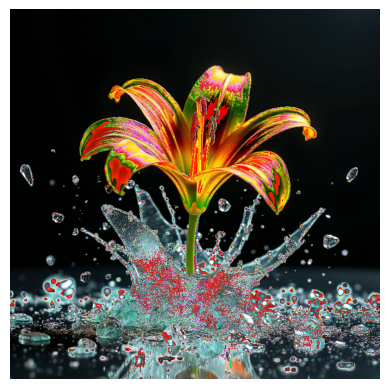

In [12]:
# use case
import matplotlib.pyplot as plt
tensor = reconstructed.cpu().numpy()
image_array = tensor[0]
image_array = np.transpose(image_array, (1, 2, 0))
image_array = (image_array * 255).astype(np.uint8)

plt.imshow(image_array)
plt.axis('off')
plt.show()